# ARIMA&FFT

In [2]:
import numpy as np
import pmdarima as pm
from scipy.fft import rfft, irfft
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
data = np.load('../../../data/processed/labeled_data.npz')
electrical_values = data['electrical_values']
labels = data['labels']

## ARIMA

In [5]:
arimas = [None] * len(electrical_values) # 507

for i, electrical_value in enumerate(electrical_values):
    arima_model = pm.auto_arima(electrical_value, start_p=1, d=1, start_q=1, max_p=2, max_d=1, max_q=2, seasonal=False, \
                                information_criterion='aicc')
    arimas[i] = arima_model

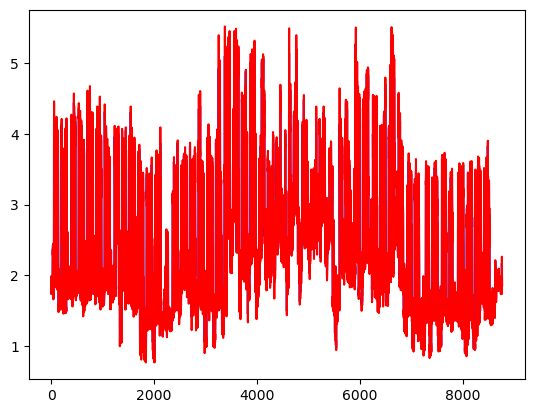

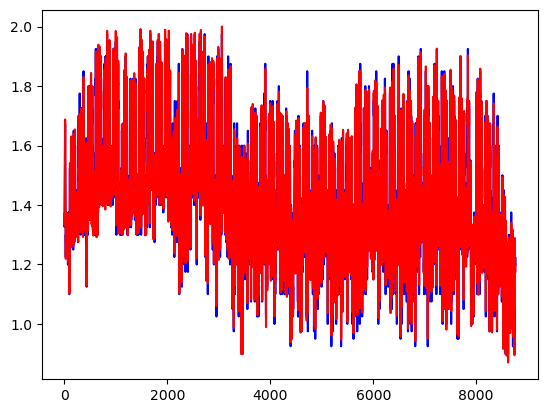

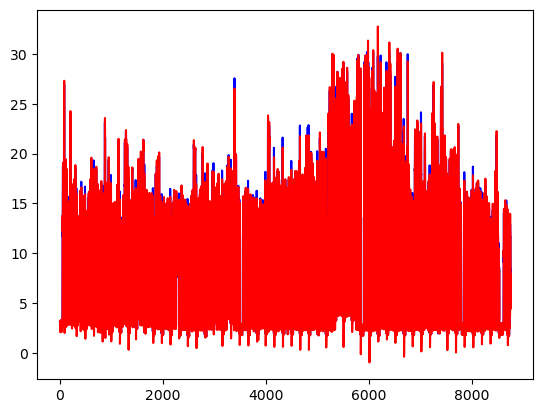

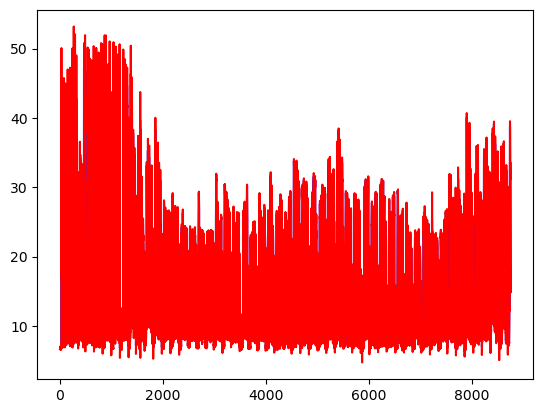

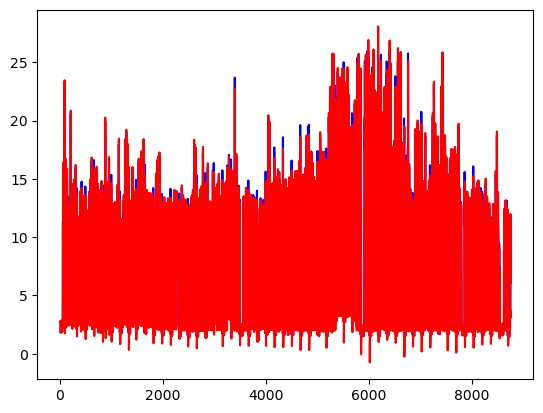

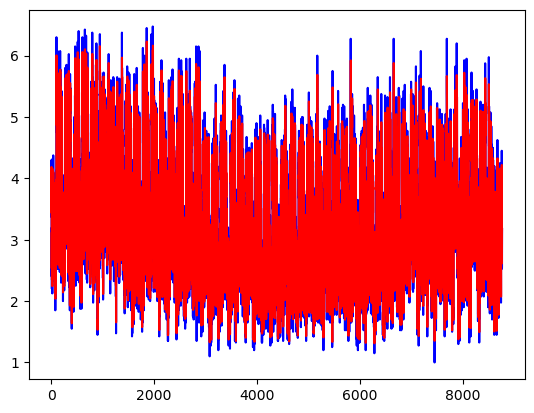

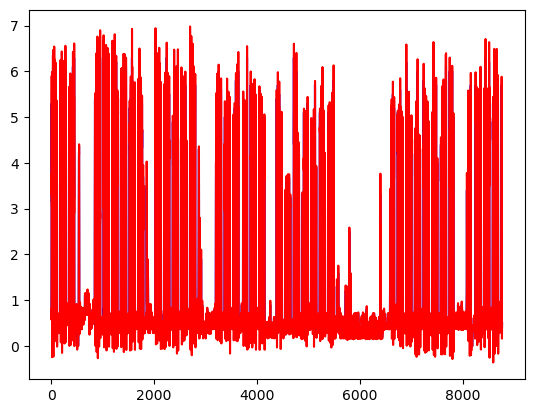

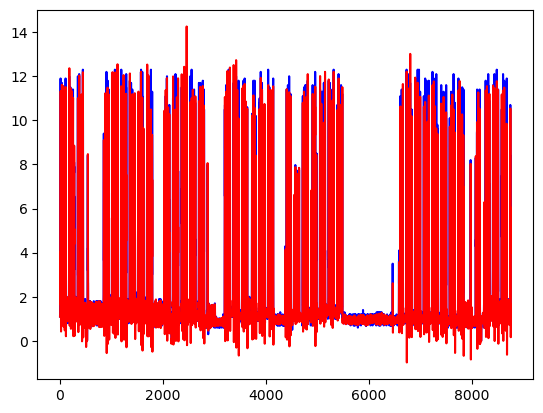

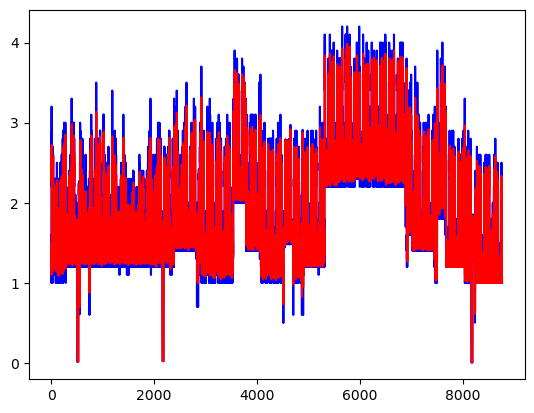

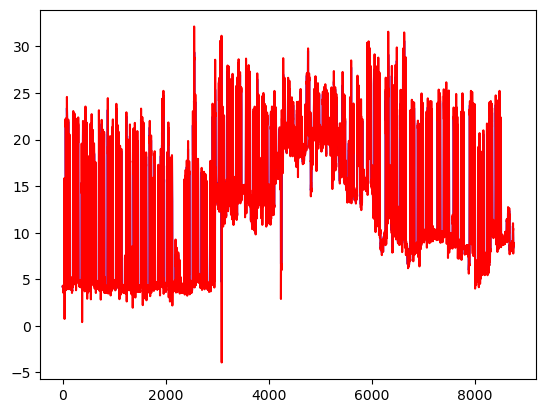

In [6]:
nr_plots = 10
arimas_fitted = [arima.predict_in_sample() for arima in arimas]

for arima_fitted, electrical_value in zip(arimas_fitted[:nr_plots], electrical_values[:nr_plots]):
    arima_fitted[0] = electrical_value[0]
    arima_fitted[-1] = electrical_value[-1]
    plt.figure()
    plt.plot(electrical_value, 'b')
    plt.plot(arima_fitted, 'r')
    plt.show()

In [7]:
for arima in arimas:
    print(arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8760
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -772.015
Date:                Fri, 06 Dec 2024   AIC                           1548.029
Time:                        13:30:27   BIC                           1562.185
Sample:                             0   HQIC                          1552.852
                               - 8760                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2983      0.006     48.694      0.000       0.286       0.310
sigma2         0.0698      0.001    135.500      0.000       0.069       0.071
Ljung-Box (L1) (Q):                   0.05   Jarque-

## FFT

In [8]:
ffts = [None] * len(electrical_values) # 507

for i, electrical_value in enumerate(electrical_values):
    freqs = rfft(electrical_value)
    new_electrical_values = []
    for nr_vals in [1, 10, 100, 1000]:
        new_electrical_values.append(irfft(freqs[:nr_vals], n=len(electrical_value))) # 8760
    ffts[i] = new_electrical_values
ffts = np.array(ffts)
print(ffts[0], len(ffts[0]))

[[2.43076644 2.43076644 2.43076644 ... 2.43076644 2.43076644 2.43076644]
 [2.12656458 2.12706416 2.12756659 ... 2.12508291 2.12557395 2.12606784]
 [1.8502078  1.85168554 1.85338454 ... 1.8470174  1.84788189 1.84894269]
 [1.89209252 1.87053825 1.84972515 ... 1.96842921 1.94246249 1.91596448]] 4


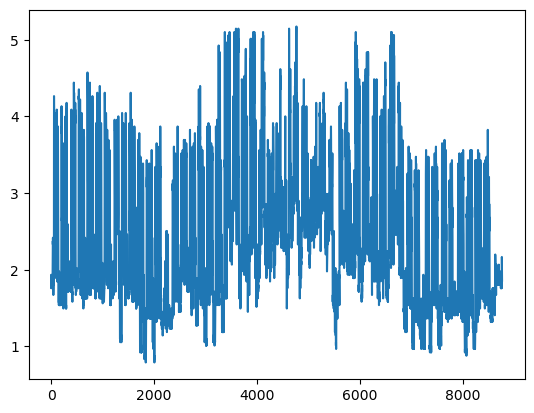

<Figure size 640x480 with 0 Axes>

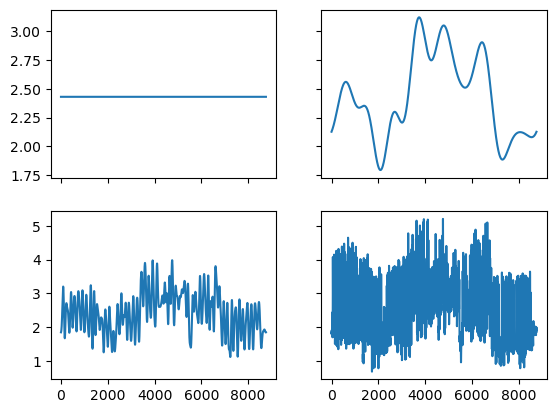

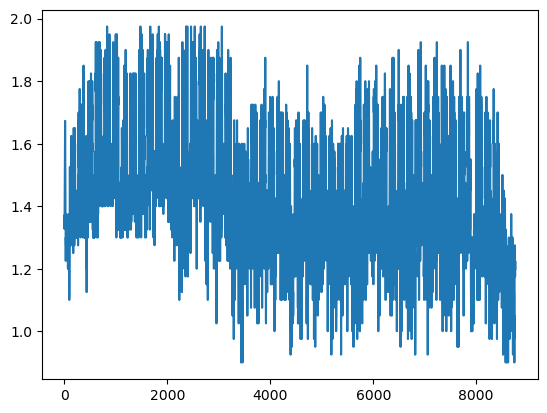

<Figure size 640x480 with 0 Axes>

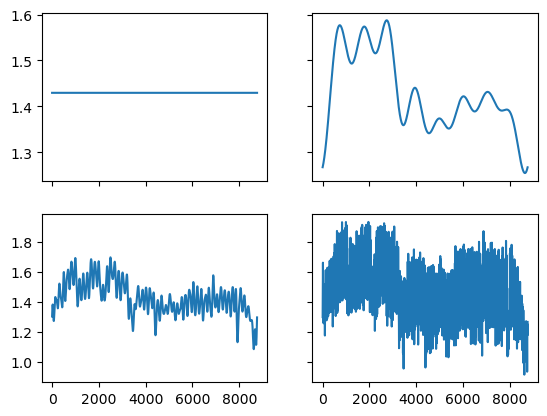

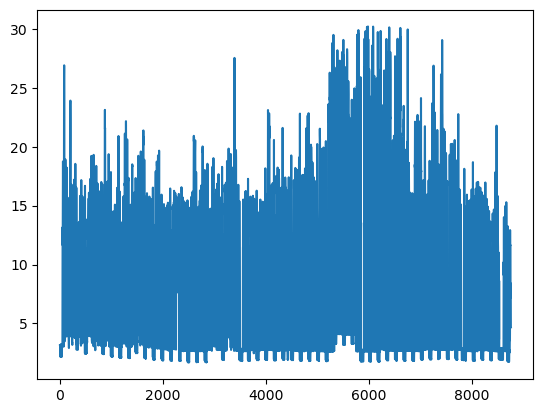

<Figure size 640x480 with 0 Axes>

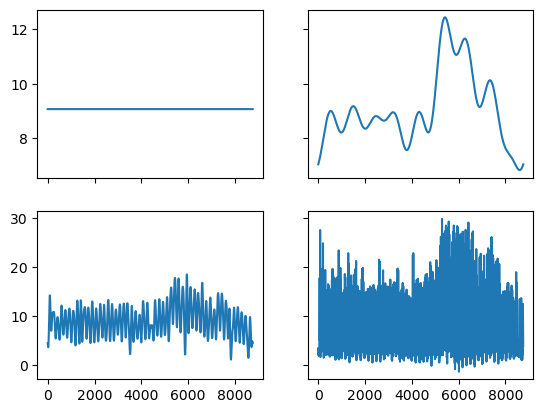

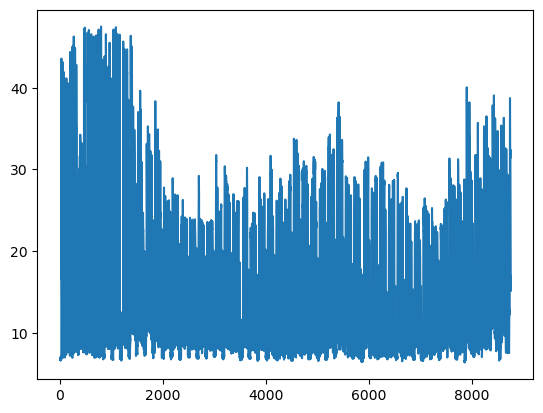

<Figure size 640x480 with 0 Axes>

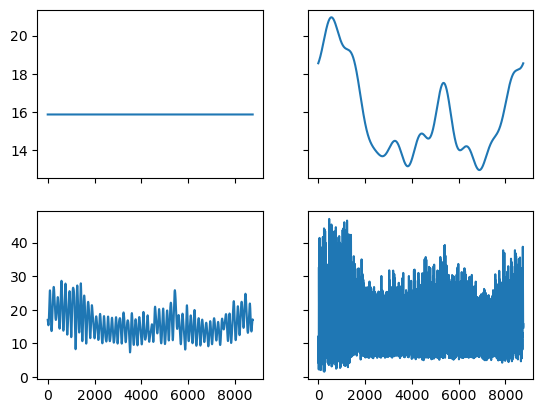

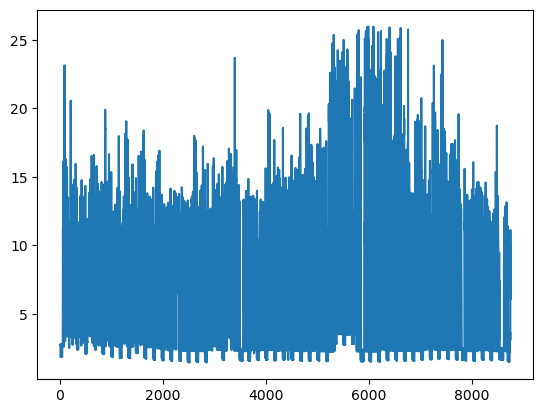

<Figure size 640x480 with 0 Axes>

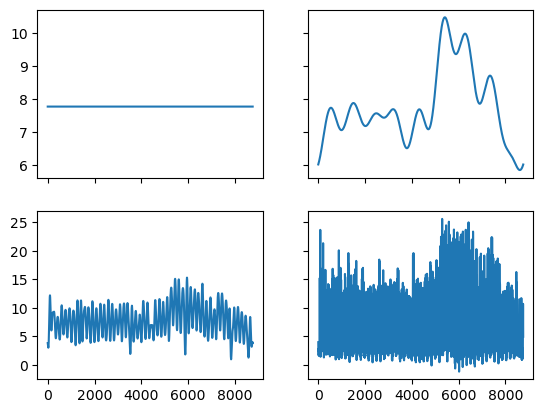

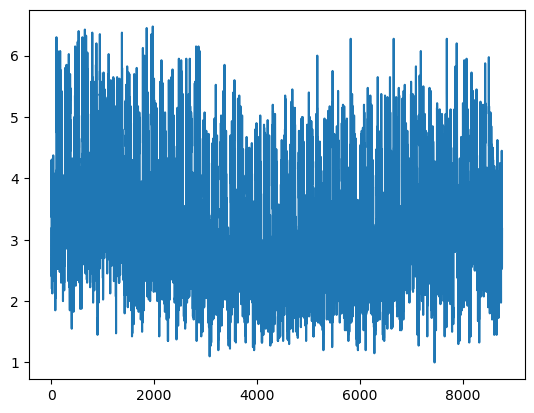

<Figure size 640x480 with 0 Axes>

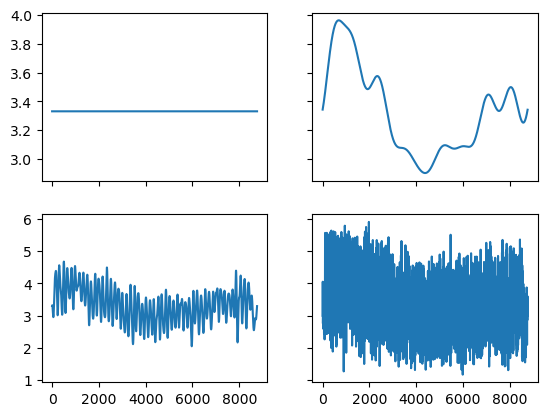

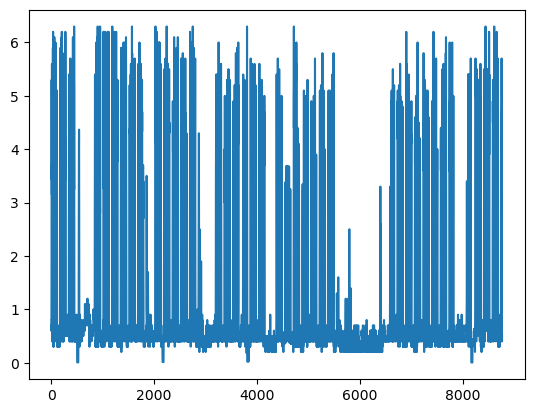

<Figure size 640x480 with 0 Axes>

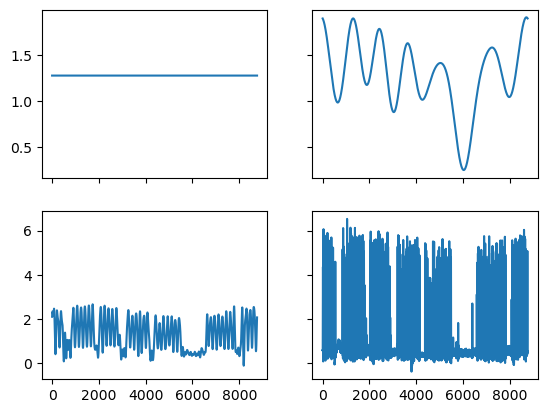

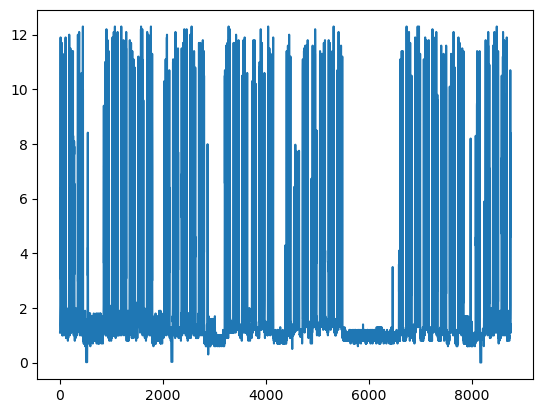

<Figure size 640x480 with 0 Axes>

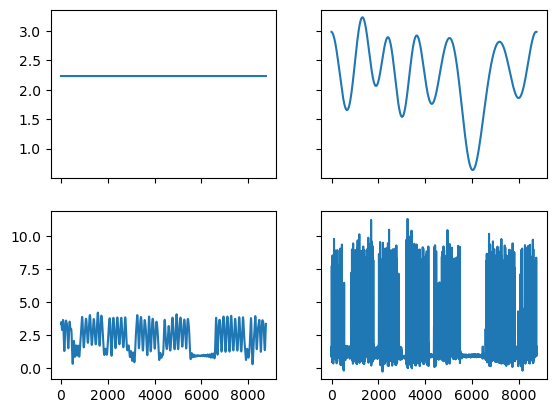

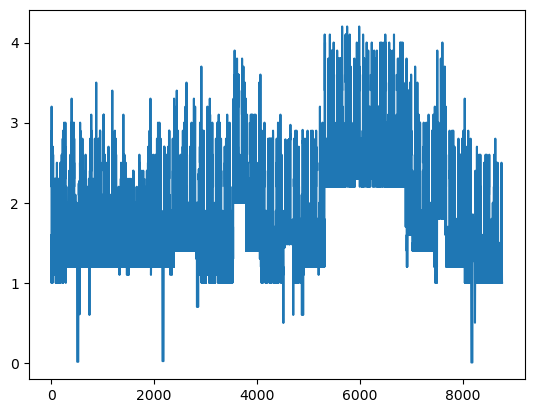

<Figure size 640x480 with 0 Axes>

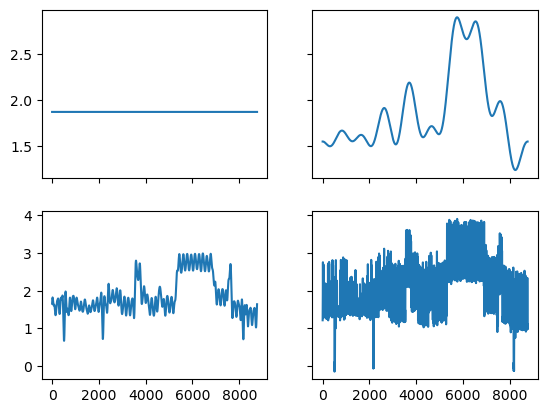

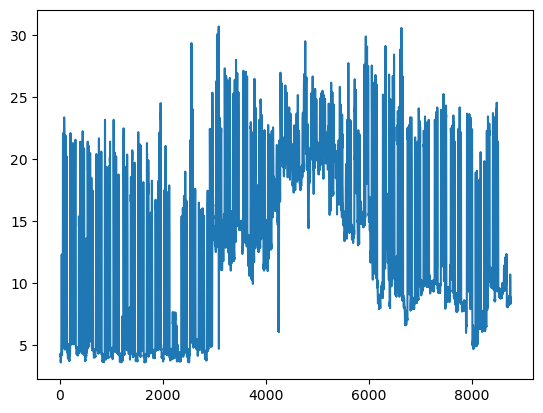

<Figure size 640x480 with 0 Axes>

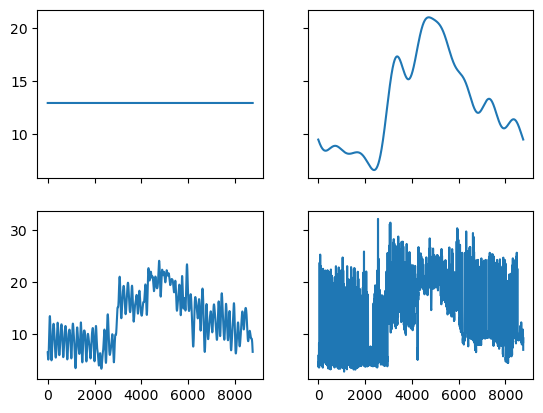

In [9]:
nr_plots = 10

for fft, electrical_value in zip(ffts[:nr_plots], electrical_values[:nr_plots]):
    plt.figure()
    plt.plot(electrical_value)
    plt.show()
    plt.figure()
    f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex='col', sharey='row')
    ax0.plot(fft[0])
    ax1.plot(fft[1])
    ax2.plot(fft[2])
    ax3.plot(fft[3])
    plt.show()

In [10]:
ffts[0]

array([[2.43076644, 2.43076644, 2.43076644, ..., 2.43076644, 2.43076644,
        2.43076644],
       [2.12656458, 2.12706416, 2.12756659, ..., 2.12508291, 2.12557395,
        2.12606784],
       [1.8502078 , 1.85168554, 1.85338454, ..., 1.8470174 , 1.84788189,
        1.84894269],
       [1.89209252, 1.87053825, 1.84972515, ..., 1.96842921, 1.94246249,
        1.91596448]])

In [11]:
combined_data = [None] * len(electrical_values) # 507

for i, (electrical_value, arima_fitted, fft) in enumerate(zip(electrical_values, arimas_fitted, ffts)):
    electrical_value = np.expand_dims(electrical_value, 0)
    arima_fitted = np.expand_dims(arima_fitted, 0)
    data_row = np.concatenate((electrical_value, arima_fitted, fft), 0)
    combined_data[i] = data_row

combined_data = np.array(combined_data)
print(combined_data[:10])

[[[ 1.847       1.759       1.935      ...  2.033       1.897
    1.86      ]
  [ 1.847       1.84700004  1.73274903 ...  2.09559314  2.00943379
    1.86      ]
  [ 2.43076644  2.43076644  2.43076644 ...  2.43076644  2.43076644
    2.43076644]
  [ 2.12656458  2.12706416  2.12756659 ...  2.12508291  2.12557395
    2.12606784]
  [ 1.8502078   1.85168554  1.85338454 ...  1.8470174   1.84788189
    1.84894269]
  [ 1.89209252  1.87053825  1.84972515 ...  1.96842921  1.94246249
    1.91596448]]

 [[ 1.37        1.355       1.327      ...  1.2         1.225
    1.2       ]
  [ 1.37        1.37        1.35743639 ...  1.19075381  1.19725326
    1.2       ]
  [ 1.42935091  1.42935091  1.42935091 ...  1.42935091  1.42935091
    1.42935091]
  [ 1.26706447  1.26729093  1.2675194  ...  1.26639716  1.26661758
    1.26684002]
  [ 1.30394934  1.30993538  1.31576793 ...  1.28522134  1.29157675
    1.29782468]
  [ 1.299968    1.32735168  1.34668815 ...  1.20680038  1.23477454
    1.26751263]]

 [[ 3.16  

In [12]:
np.savez_compressed('../../../data/processed/combined_data.npz', combined_data=combined_data, labels=labels)